<a href="https://colab.research.google.com/github/AvigyanChowdhury/Statistical-and-Deep-Learning-Approaches-for-Individual-Carbon-Footprint-Calculation-in-India/blob/main/carbonFootprint_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
df = pd.read_csv("CF_DATA.csv")
df


,Age,High Meat,Low Meat,Medium Meat,Vegan,Vegetarian,Pescetarian,Beef,Fruit,Mutton,...,Electric vehicle,Plane,MotorBike,Train,Electicity,AudioMP3S,FullHD Video,gender,Residence,carbon footprint
0,33,0,1,0,NaN,NaN,NaN,NaN,NaN,113.0,...,NaN,NaN,27.0,NaN,7,0.0,NaN,F,rural,31.035
1,39,0,1,0,NaN,1.0,0.0,NaN,382.0,NaN,...,NaN,NaN,NaN,NaN,8,NaN,NaN,F,rural,11.818
2,26,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,8,NaN,0.0,M,urban,31.067
3,58,1,0,0,NaN,NaN,NaN,132.0,68.0,55.0,...,NaN,NaN,NaN,NaN,5,3.0,6.0,F,rural,19.199
4,24,0,0,0,NaN,1.0,NaN,35.0,239.0,NaN,...,NaN,NaN,19.0,187.0,2,NaN,NaN,F,urban,14.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016,27,0,0,1,NaN,NaN,NaN,NaN,423.0,5.0,...,NaN,NaN,NaN,NaN,10,6.0,6.0,F,urban,17.624
10017,52,0,1,0,NaN,NaN,NaN,NaN,NaN,142.0,...,NaN,NaN,NaN,NaN,2,0.0,4.0,M,rural,11.007
10018,20,1,1,0,NaN,NaN,NaN,36.0,NaN,NaN,...,7.0,NaN,2.0,NaN,10,1.0,5.0,M,urban,18.685
10019,33,1,1,1,NaN,NaN,1.0,NaN,410.0,54.0,...,16.0,NaN,25.0,NaN,6,6.0,3.0,F,rural,23.812


##Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10021 non-null  int64  
 1   High Meat         10021 non-null  int64  
 2   Low Meat          10021 non-null  int64  
 3   Medium Meat       10021 non-null  int64  
 4   Vegan             1044 non-null   float64
 5   Vegetarian        2115 non-null   float64
 6   Pescetarian       4994 non-null   float64
 7   Beef              2989 non-null   float64
 8   Fruit             4885 non-null   float64
 9   Mutton            5812 non-null   float64
 10  Milk              5907 non-null   float64
 11  Nuts              1946 non-null   float64
 12  Pork              1934 non-null   float64
 13  Potato            8919 non-null   float64
 14  Rice              9483 non-null   float64
 15  Vegetable         9430 non-null   float64
 16  Boat              998 non-null    float6

In [ ]:
df.isnull().sum()

Age                    0
High Meat              0
Low Meat               0
Medium Meat            0
Vegan               8977
Vegetarian          7906
Pescetarian         5027
Beef                7032
Fruit               5136
Mutton              4209
Milk                4114
Nuts                8075
Pork                8087
Potato              1102
Rice                 538
Vegetable            591
Boat                9023
Bus                 2121
Car                 7167
Electric vehicle    8126
Plane               9093
MotorBike           4972
Train               8011
Electicity             0
AudioMP3S            518
FullHD Video         500
gender                 0
Residence              0
carbon footprint       0
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.sample(20)

,Age,High Meat,Low Meat,Medium Meat,Vegan,Vegetarian,Pescetarian,Beef,Fruit,Mutton,...,Electric vehicle,Plane,MotorBike,Train,Electicity,AudioMP3S,FullHD Video,gender,Residence,carbon footprint
6632,22,0,0,1,1.0,0.0,1.0,0.0,26.0,215.0,...,0.0,0.0,0.0,0.0,9,6.0,2.0,F,urban,28.133
5713,49,0,0,1,0.0,0.0,0.0,0.0,0.0,98.0,...,0.0,0.0,11.0,0.0,5,5.0,3.0,M,rural,23.506
6011,33,0,1,1,0.0,1.0,0.0,0.0,0.0,221.0,...,5.0,127.0,0.0,0.0,4,1.0,4.0,M,rural,58.754
6603,41,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,29.0,9,3.0,0.0,M,rural,16.138
2528,55,1,0,0,0.0,1.0,0.0,0.0,0.0,154.0,...,0.0,76.0,8.0,0.0,8,3.0,5.0,M,urban,59.273
8912,44,1,0,0,0.0,0.0,1.0,0.0,0.0,97.0,...,0.0,477.0,0.0,0.0,4,2.0,5.0,F,urban,167.337
8224,28,1,0,1,0.0,0.0,1.0,229.0,37.0,0.0,...,0.0,0.0,26.0,0.0,3,1.0,5.0,F,urban,22.202
9409,24,1,1,1,0.0,0.0,0.0,144.0,218.0,24.0,...,0.0,0.0,0.0,0.0,8,1.0,0.0,M,urban,19.870
121,37,0,0,1,0.0,0.0,1.0,109.0,41.0,0.0,...,0.0,0.0,26.0,0.0,8,0.0,0.0,M,rural,16.558
558,26,0,1,0,0.0,1.0,0.0,249.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,0.0,1.0,F,rural,29.599


In [ ]:
df1=df

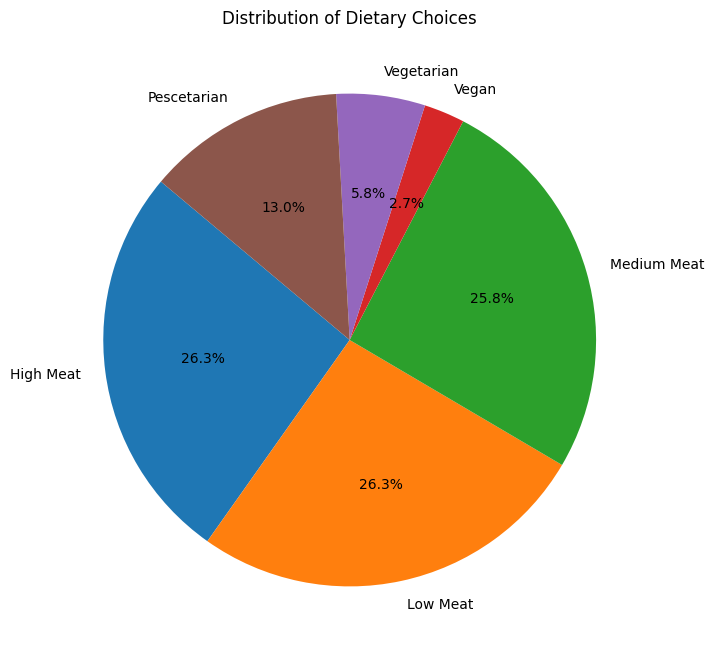

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'df' with your actual DataFrame name

# Select the dietary choice columns
diet_columns = ['High Meat', 'Low Meat', 'Medium Meat', 'Vegan', 'Vegetarian', 'Pescetarian']

# Calculate the sum of each dietary choice column
diet_counts = df[diet_columns].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dietary Choices')
plt.show()


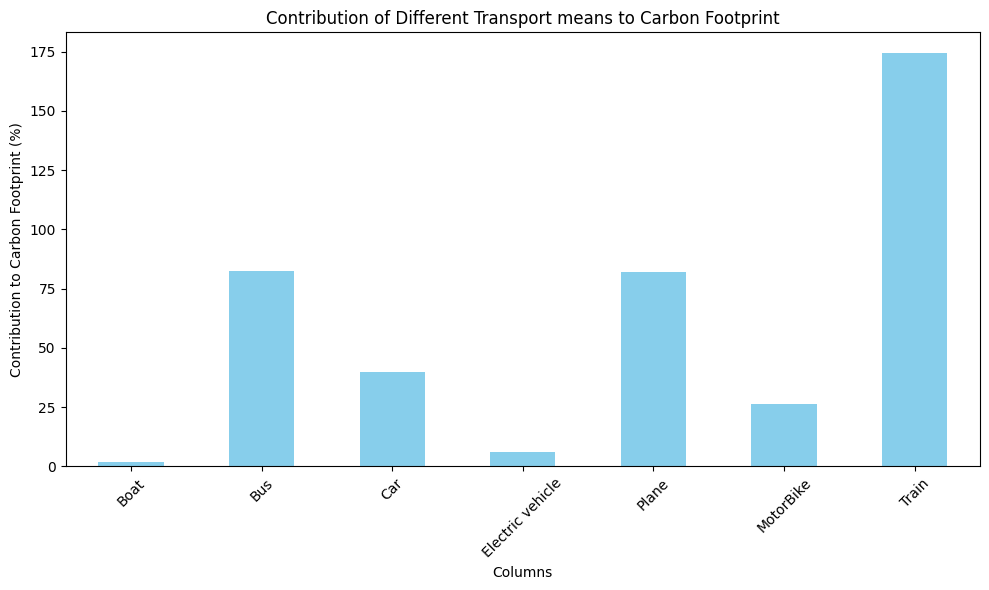

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'df' with your actual DataFrame name

# Filter out non-numeric columns and select 'carbon footprint'
numeric_columns = df.select_dtypes(include=['number'])[['Boat', 'Bus', 'Car', 'Electric vehicle', 'Plane', 'MotorBike', 'Train']]

# Calculate the sum of each numeric column
numeric_sums = numeric_columns.sum()

# Calculate the total carbon footprint
total_carbon_footprint = df['carbon footprint'].sum()

# Calculate the contribution of each column to the total carbon footprint
contribution_percentages = (numeric_sums / total_carbon_footprint) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
contribution_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Contribution to Carbon Footprint (%)')
plt.title('Contribution of Different Transport means to Carbon Footprint')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


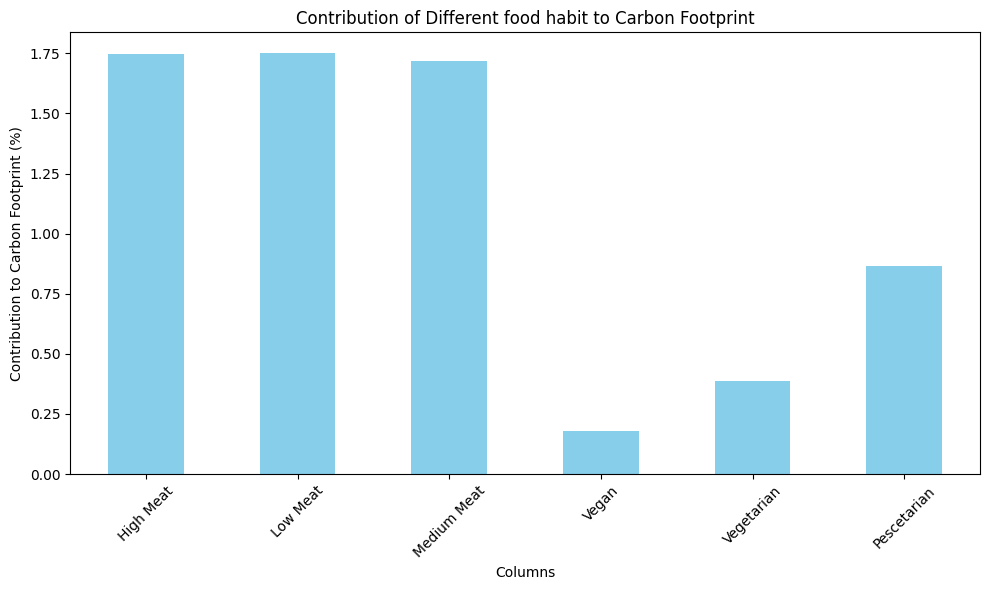

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'df' with your actual DataFrame name

# Filter out non-numeric columns and select 'carbon footprint'
numeric_columns = df.select_dtypes(include=['number'])[['High Meat', 'Low Meat', 'Medium Meat', 'Vegan', 'Vegetarian', 'Pescetarian']]

# Calculate the sum of each numeric column
numeric_sums = numeric_columns.sum()

# Calculate the total carbon footprint
total_carbon_footprint = df['carbon footprint'].sum()

# Calculate the contribution of each column to the total carbon footprint
contribution_percentages = (numeric_sums / total_carbon_footprint) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
contribution_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Contribution to Carbon Footprint (%)')
plt.title('Contribution of Different food habit to Carbon Footprint')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['Residence ']

0        rural
1        rural
2        urban
3        rural
4        urban
         ...  
10016    urban
10017    rural
10018    urban
10019    rural
10020    urban
Name: Residence , Length: 10021, dtype: object

In [ ]:
from pandas.io.formats.info import DataFrameInfoPrinter
X =df.drop(['carbon footprint', 'gender','Residence ','Age'], axis=1)
y = df['carbon footprint']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##ANN model

In [ ]:
# model = Sequential()
# model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(6, activation='softmax'))
# model.add(Dense(1))

In [ ]:
# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

In [ ]:
# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error (MSE): {mse:.4f}')
# print(f'Mean Absolute Error (MAE): {mae:.4f}')
# print(f'R-squared (R2) Score: {r2:.4f}')

##Regression ML models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable



# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the regression models
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
svm_model = SVR()
knn_model = KNeighborsRegressor()

# Train the regression models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
elasticnet_predictions = elasticnet_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Calculate MSE scores
linear_mse = mean_squared_error(y_test, linear_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Create the table
table = PrettyTable()
table.field_names = ["Model", "MSE Score"]
table.add_row(["Linear Regression", linear_mse])
table.add_row(["Lasso Regression", lasso_mse])
table.add_row(["Ridge Regression", ridge_mse])
table.add_row(["ElasticNet Regression", elasticnet_mse])
table.add_row(["Decision Tree", decision_tree_mse])
table.add_row(["Random Forest", random_forest_mse])
table.add_row(["Gradient Boosting", gradient_boosting_mse])
table.add_row(["Support Vector Machine", svm_mse])
table.add_row(["K-Nearest Neighbors", knn_mse])

# Print the table
print(table)


+------------------------+------------------------+
|         Model          |       MSE Score        |
+------------------------+------------------------+
|   Linear Regression    | 1.7441266085044076e-27 |
|    Lasso Regression    |   12.805684488002605   |
|    Ridge Regression    | 1.1381085431561929e-05 |
| ElasticNet Regression  |   93.74663137603822    |
|     Decision Tree      |   18.580103335162097   |
|     Random Forest      |   7.384675375962794    |
|   Gradient Boosting    |   3.8044449687599218   |
| Support Vector Machine |   144.14270552909113   |
|  K-Nearest Neighbors   |    83.4980784215661    |
+------------------------+------------------------+


##MLP model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#Multilayer Perceptron (MLP):
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Single output neuron for regression

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/25
501/501 [==============================] - 8s 3ms/step - loss: 272.2553 - val_loss: 8.1032
Epoch 2/25
501/501 [==============================] - 1s 3ms/step - loss: 5.6227 - val_loss: 4.0083
Epoch 3/25
501/501 [==============================] - 1s 3ms/step - loss: 2.8025 - val_loss: 2.6039
Epoch 4/25
501/501 [==============================] - 2s 3ms/step - loss: 1.5710 - val_loss: 1.5941
Epoch 5/25
501/501 [==============================] - 2s 4ms/step - loss: 0.9585 - val_loss: 0.9531
Epoch 6/25
501/501 [==============================] - 1s 3ms/step - loss: 0.6738 - val_loss: 0.6939
Epoch 7/25
501/501 [==============================] - 1s 3ms/step - loss: 0.5083 - val_loss: 0.5109
Epoch 8/25
501/501 [==============================] - 1s 3ms/step - loss: 0.4176 - val_loss: 0.4804
Epoch 9/25
501/501 [==============================] - 1s 3ms/step - loss: 0.3370 - val_loss: 0.3726
Epoch 10/25
501/501 [==============================] - 1s 3ms/step - loss: 0.2987 - val_loss: 0.31

In [ ]:
#Calculating metrics for MLP

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
# Calculate metrics
mse_MLP = mean_squared_error(y_test, y_pred)
mae_MLP = mean_absolute_error(y_test, y_pred)
r2_MLP = r2_score(y_test, y_pred)
#print("Accuracy:", accuracy)
print(f'Mean Squared Error (MSE): {mse_MLP:.4f}')
print(f'Mean Absolute Error (MAE): {mae_MLP:.4f}')
print(f'R-squared (R2) Score: {r2_MLP:.4f}')

63/63 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 0.1217
Mean Absolute Error (MAE): 0.2676
R-squared (R2) Score: 0.9998


In [ ]:
print(X_train.shape)


(8016, 25)


##LSTM model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming you have X_train and y_train data ready

# Reshape X_train to (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(25, 1)))  # 64 units in the LSTM layer
model.add(Dense(1))  # Single output neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=16)

# Assuming you have X_test data ready
# Reshape X_test to (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Do further processing with predictions...


Epoch 1/25
501/501 [==============================] - 5s 4ms/step - loss: 823.3533
Epoch 2/25
501/501 [==============================] - 2s 4ms/step - loss: 691.1373
Epoch 3/25
501/501 [==============================] - 2s 4ms/step - loss: 690.5729
Epoch 4/25
501/501 [==============================] - 2s 4ms/step - loss: 688.7658
Epoch 5/25
501/501 [==============================] - 2s 4ms/step - loss: 578.9578
Epoch 6/25
501/501 [==============================] - 2s 4ms/step - loss: 455.5792
Epoch 7/25
501/501 [==============================] - 2s 5ms/step - loss: 393.0446
Epoch 8/25
501/501 [==============================] - 2s 4ms/step - loss: 338.5897
Epoch 9/25
501/501 [==============================] - 2s 4ms/step - loss: 284.7588
Epoch 10/25
501/501 [==============================] - 2s 4ms/step - loss: 234.4704
Epoch 11/25
501/501 [==============================] - 2s 4ms/step - loss: 191.6577
Epoch 12/25
501/501 [==============================] - 2s 4ms/step - loss: 155.9003
E

In [ ]:

# Calculate metrics of LSTM model
mse_LSTM = mean_squared_error(y_test,predictions )
mae_LSTM = mean_absolute_error(y_test,predictions )
r2_LSTM = r2_score(y_test,predictions )

print(f'Mean Squared Error (MSE) of LSTM: {mse_LSTM:.4f}')
print(f'Mean Absolute Error (MAE) of LSTM: {mae_LSTM:.4f}')
print(f'R-squared (R2) Score of LSTM: {r2_LSTM:.4f}')

Mean Squared Error (MSE) of LSTM: 26.4969
Mean Absolute Error (MAE) of LSTM: 3.3968
R-squared (R2) Score of LSTM: 0.9628


In [ ]:
X_train.shape

(8016, 25, 1)

CNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming you have X_train and y_train data ready as pandas DataFrames

# Convert X_train and y_train to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape X_train to (samples, time steps, features)
# Assuming your input shape is (7014, 25)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the CNN model
model = Sequential()

# First convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, 3, activation='relu', input_shape=(25, 1)))
model.add(MaxPooling1D(2))

# Second convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))

# Flatten the output to a 1D vector
model.add(Flatten())

# Dense layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Single output neuron for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=16)

# Assuming you have X_test data ready as a pandas DataFrame

# Convert X_test to a NumPy array
X_test = np.array(X_test)

# Reshape X_test to (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Do further processing with predictions...


Epoch 1/25
501/501 [==============================] - 10s 3ms/step - loss: 281.2196
Epoch 2/25
501/501 [==============================] - 2s 3ms/step - loss: 49.6597
Epoch 3/25
501/501 [==============================] - 2s 3ms/step - loss: 33.0583
Epoch 4/25
501/501 [==============================] - 2s 4ms/step - loss: 23.5361
Epoch 5/25
501/501 [==============================] - 2s 3ms/step - loss: 20.1293
Epoch 6/25
501/501 [==============================] - 2s 3ms/step - loss: 16.6364
Epoch 7/25
501/501 [==============================] - 2s 3ms/step - loss: 14.6774
Epoch 8/25
501/501 [==============================] - 2s 3ms/step - loss: 13.0040
Epoch 9/25
501/501 [==============================] - 2s 3ms/step - loss: 11.8166
Epoch 10/25
501/501 [==============================] - 2s 3ms/step - loss: 11.2762
Epoch 11/25
501/501 [==============================] - 2s 4ms/step - loss: 10.3842
Epoch 12/25
501/501 [==============================] - 2s 4ms/step - loss: 10.2964
Epoch 13/25

In [ ]:

# Calculate metrics
mse_CNN = mean_squared_error(y_test, predictions)
mae_CNN = mean_absolute_error(y_test, predictions)
r2_CNN = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE) of CNN: {mse_CNN:.4f}')
print(f'Mean Absolute Error (MAE) of CNN: {mae_CNN:.4f}')
print(f'R-squared (R2) Score of CNN: {r2_CNN:.4f}')


Mean Squared Error (MSE) of CNN: 8.8603
Mean Absolute Error (MAE) of CNN: 2.3680
R-squared (R2) Score of CNN: 0.9876


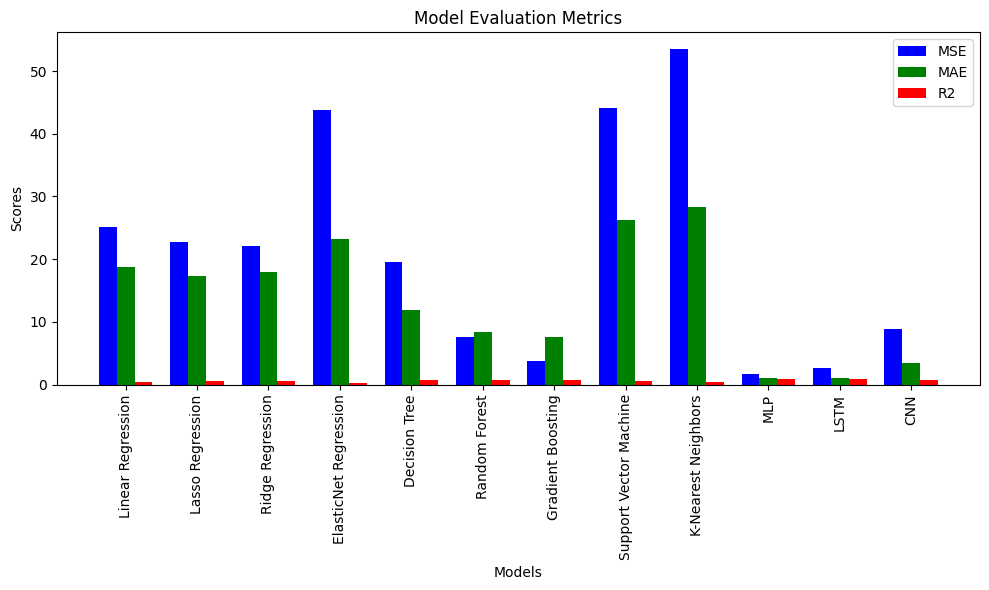

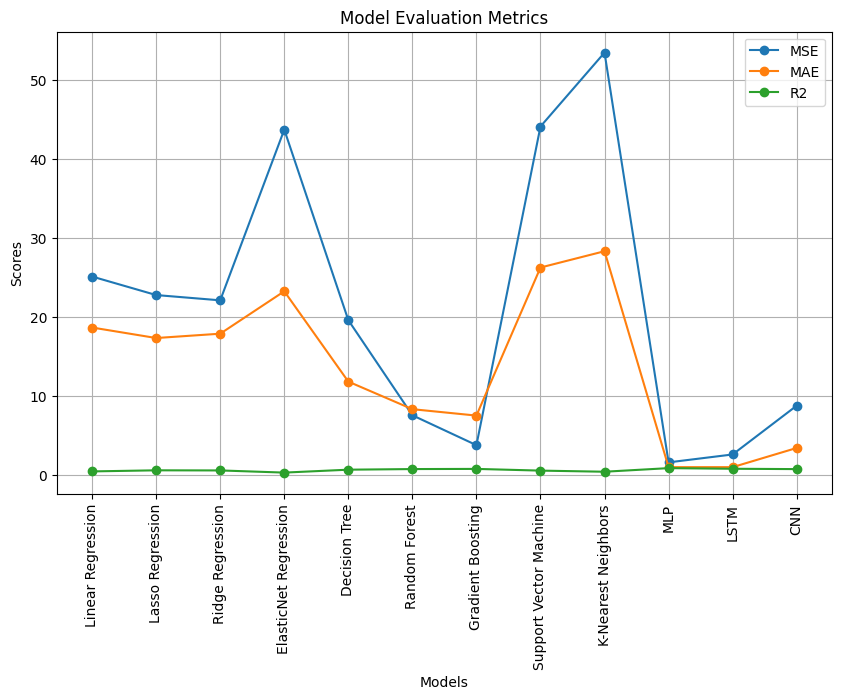

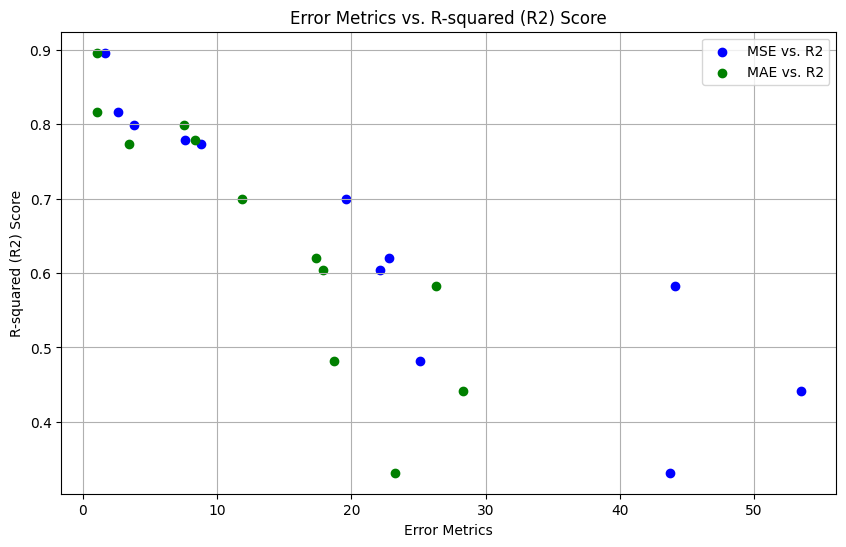

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression',
          'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
          'K-Nearest Neighbors', 'MLP', 'LSTM', 'CNN']

mse = [25.1485, 22.8057, 22.1381, 43.7466, 19.6267, 7.5875, 3.8044, 44.1427, 53.4981, 1.6268, 2.6268, 8.8010]
mae = [18.6958, 17.3657, 17.9152, 23.2843, 11.8491, 8.3584, 7.5482, 26.2897, 28.3549, 1.0217, 1.0217, 3.4491]
r2 = [0.4821, 0.6199, 0.6046, 0.3315, 0.7002, 0.7786, 0.7989, 0.5824, 0.4412, 0.8963, 0.8163, 0.7736]

# Bar Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, mse, width, label='MSE', color='b')
plt.bar(x, mae, width, label='MAE', color='g')
plt.bar(x + width, r2, width, label='R2', color='r')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(x, models, rotation=90)
plt.legend()
plt.tight_layout()

plt.savefig('bar_plot.png')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))

plt.plot(models, mse, label='MSE', marker='o')
plt.plot(models, mae, label='MAE', marker='o')
plt.plot(models, r2, label='R2', marker='o')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=90)
plt.legend()
plt.grid()

plt.savefig('line_plot.png')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(mse, r2, label='MSE vs. R2', color='b', marker='o')
plt.scatter(mae, r2, label='MAE vs. R2', color='g', marker='o')

plt.xlabel('Error Metrics')
plt.ylabel('R-squared (R2) Score')
plt.title('Error Metrics vs. R-squared (R2) Score')
plt.legend()
plt.grid()

plt.savefig('scatter_plot.png')
plt.show()


In [ ]:
!pip install plotly

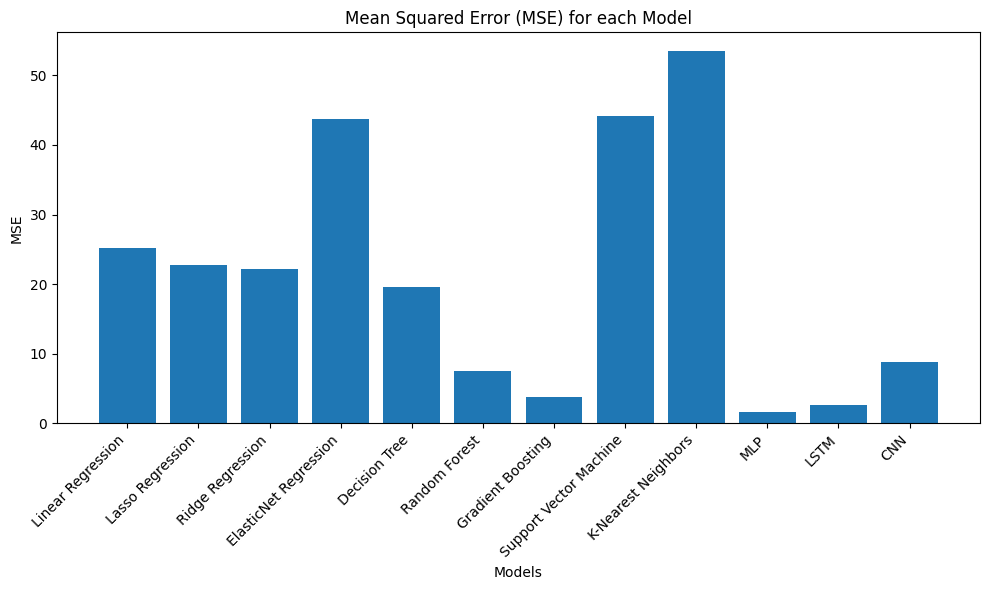

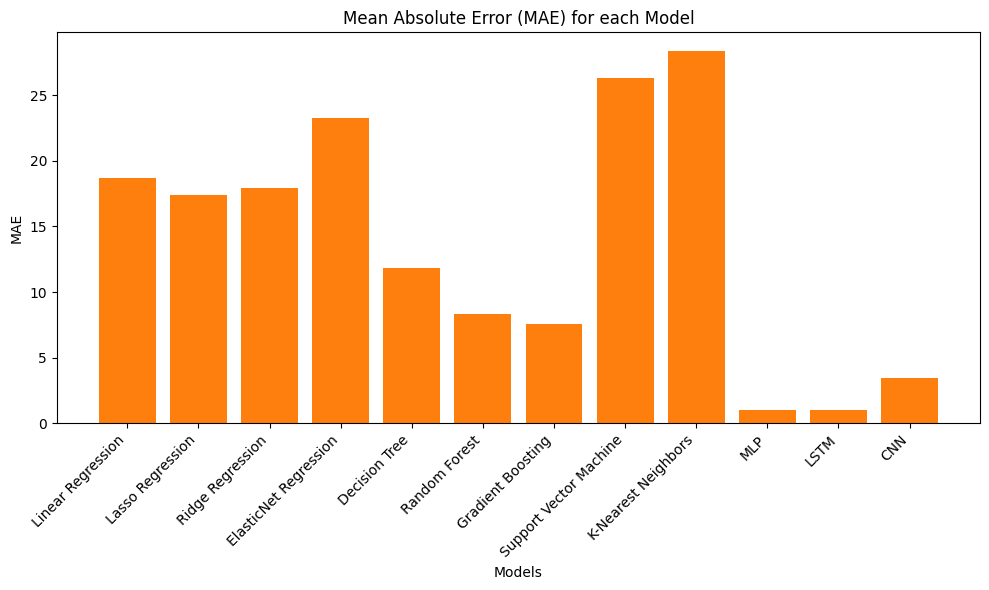

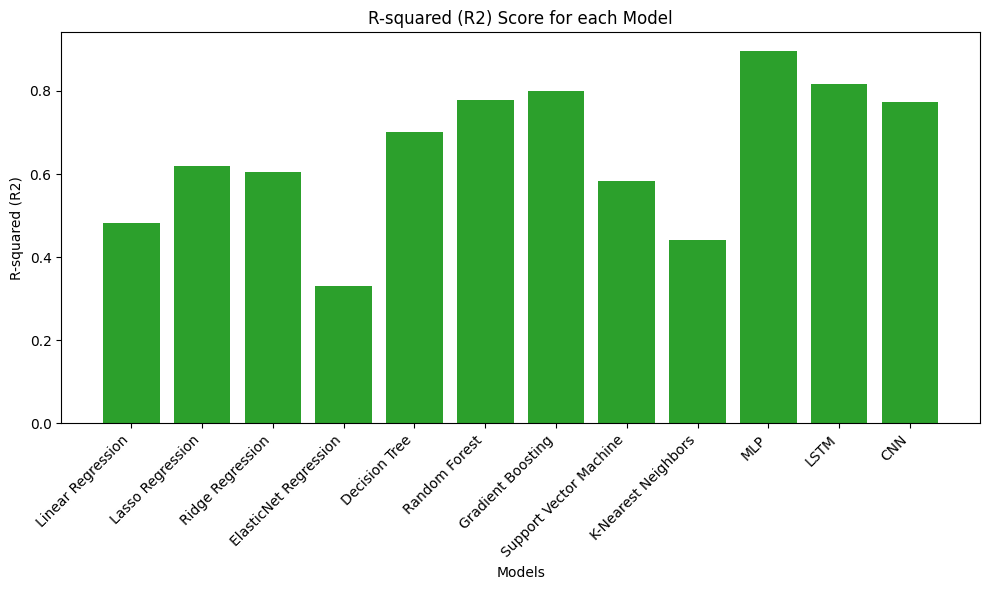

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression',
          'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine',
          'K-Nearest Neighbors', 'MLP', 'LSTM', 'CNN']

mse = [25.1485, 22.8057, 22.1381, 43.7466, 19.6267, 7.5875, 3.8044, 44.1427, 53.4981, 1.6268, 2.6268, 8.8010]
mae = [18.6958, 17.3657, 17.9152, 23.2843, 11.8491, 8.3584, 7.5482, 26.2897, 28.3549, 1.0217, 1.0217, 3.4491]
r2 = [0.4821, 0.6199, 0.6046, 0.3315, 0.7002, 0.7786, 0.7989, 0.5824, 0.4412, 0.8963, 0.8163, 0.7736]

# Plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='#1f77b4')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) for each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mse_plot.png')
plt.show()

# Plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='#ff7f0e')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mae_plot.png')
plt.show()

# Plot for R2
plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='#2ca02c')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) Score for each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('r2_plot.png')
plt.show()



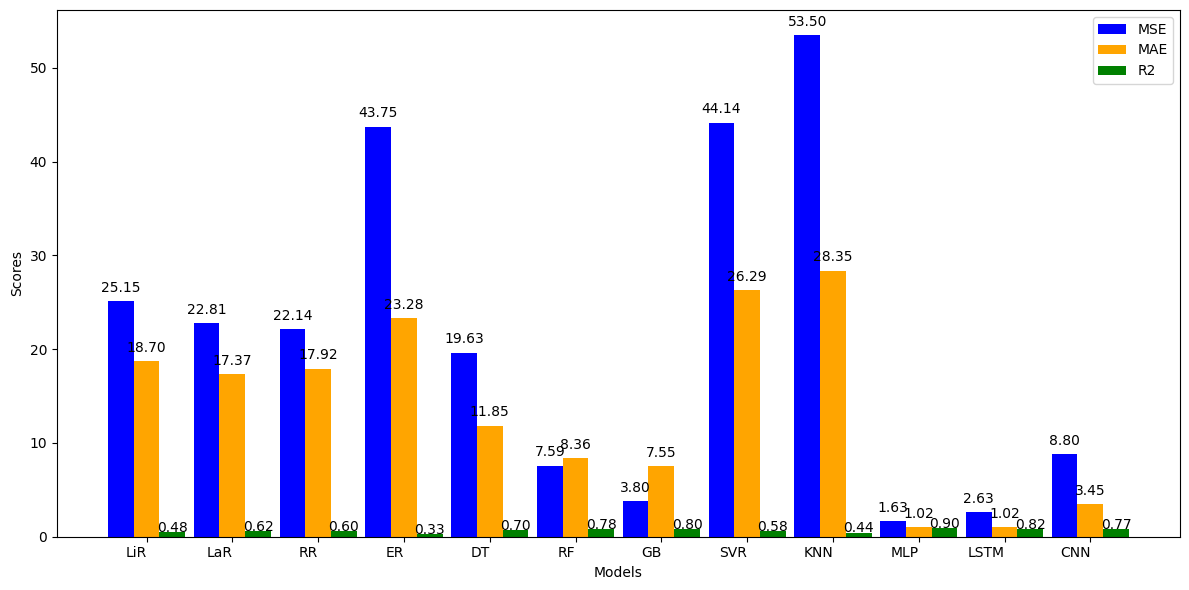

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LiR', 'LaR', 'RR', 'ER',
          'DT', 'RF', 'GB', 'SVR',
          'KNN', 'MLP', 'LSTM', 'CNN']

mse = [25.1485, 22.8057, 22.1381, 43.7466, 19.6267, 7.5875, 3.8044, 44.1427, 53.4981, 1.6268, 2.6268, 8.8010]
mae = [18.6958, 17.3657, 17.9152, 23.2843, 11.8491, 8.3584, 7.5482, 26.2897, 28.3549, 1.0217, 1.0217, 3.4491]
r2 = [0.4821, 0.6199, 0.6046, 0.3315, 0.7002, 0.7786, 0.7989, 0.5824, 0.4412, 0.8963, 0.8163, 0.7736]

# Set the positions and width for the bars
positions = np.arange(len(models))
width = 0.3

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(positions - width, mse, width, label='MSE', color='blue')
plt.bar(positions, mae, width, label='MAE', color='orange')
plt.bar(positions + width, r2, width, label='R2', color='green')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(positions, models, rotation=0, ha='right')
plt.legend()

for i in range(len(models)):
    plt.text(positions[i] - width, mse[i] + 1, f'{mse[i]:.2f}', ha='center', color='black')
    plt.text(positions[i], mae[i] + 1, f'{mae[i]:.2f}', ha='center', color='black')
    plt.text(positions[i] + width, r2[i] + 0.01, f'{r2[i]:.2f}', ha='center', color='black')


# Show the plot
plt.tight_layout()
plt.savefig('combined_metrics_plot.png')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Assuming 'carbon footprint' is your target variable
X =df.drop(['carbon footprint', 'gender','Residence ','Age','Fruit','Milk ','Nuts','Vegetable','Rice','Potato'], axis=1)
y = df['carbon footprint']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_test, model.predict(X_test))
print("Baseline Mean Squared Error:", baseline_mse)

# Get feature importances (if applicable)
if hasattr(model, 'coef_'):
    feature_importances = model.coef_  # For linear regression
    sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)
    print("Feature Importances:")
    for importance, feature in sorted_features:
        print(f"{feature}: {importance}")
print(sorted_features)




Baseline Mean Squared Error: 0.35527096375943973
Feature Importances:
High Meat: 2.1469530174641296
Medium Meat: 1.6891191383749977
Low Meat: 1.3909062121475084
Vegan: 1.1971799088503974
Pescetarian: 1.1163795612463956
Vegetarian: 0.8342944763421122
Boat: 0.8055142354786431
Electicity: 0.7345770545210607
Plane: 0.2880901522789392
Car: 0.2570944890074731
FullHD Video: 0.12600517992444757
MotorBike: 0.10735714785169491
Bus: 0.10323200727673891
Electric vehicle: 0.08197315198800031
Train: 0.0419333033665227
Mutton: 0.03907972247826786
AudioMP3S: 0.03260197991174556
Beef: 0.027146478961856287
Pork: 0.01204336798114005
[(2.1469530174641296, 'High Meat'), (1.6891191383749977, 'Medium Meat'), (1.3909062121475084, 'Low Meat'), (1.1971799088503974, 'Vegan'), (1.1163795612463956, 'Pescetarian'), (0.8342944763421122, 'Vegetarian'), (0.8055142354786431, 'Boat'), (0.7345770545210607, 'Electicity'), (0.2880901522789392, 'Plane'), (0.2570944890074731, 'Car'), (0.12600517992444757, 'FullHD Video'), (0

In [ ]:
print(sorted_features)
len(sorted_features)

[(2.1469530174641296, 'High Meat'), (1.6891191383749977, 'Medium Meat'), (1.3909062121475084, 'Low Meat'), (1.1971799088503974, 'Vegan'), (1.1163795612463956, 'Pescetarian'), (0.8342944763421122, 'Vegetarian'), (0.8055142354786431, 'Boat'), (0.7345770545210607, 'Electicity'), (0.2880901522789392, 'Plane'), (0.2570944890074731, 'Car'), (0.12600517992444757, 'FullHD Video'), (0.10735714785169491, 'MotorBike'), (0.10323200727673891, 'Bus'), (0.08197315198800031, 'Electric vehicle'), (0.0419333033665227, 'Train'), (0.03907972247826786, 'Mutton'), (0.03260197991174556, 'AudioMP3S'), (0.027146478961856287, 'Beef'), (0.01204336798114005, 'Pork')]


19

Feature Importances:
High Meat: 2.1469530174641296
Medium Meat: 1.6891191383749977
Low Meat: 1.3909062121475084
Vegan: 1.1971799088503974
Pescetarian: 1.1163795612463956
Vegetarian: 0.8342944763421122
Boat: 0.8055142354786431
Electicity: 0.7345770545210607
Plane: 0.2880901522789392
Car: 0.2570944890074731
FullHD Video: 0.12600517992444757
MotorBike: 0.10735714785169491
Bus: 0.10323200727673891
Electric vehicle: 0.08197315198800031
Train: 0.0419333033665227
Mutton: 0.03907972247826786
AudioMP3S: 0.03260197991174556
Beef: 0.027146478961856287
Pork: 0.01204336798114005


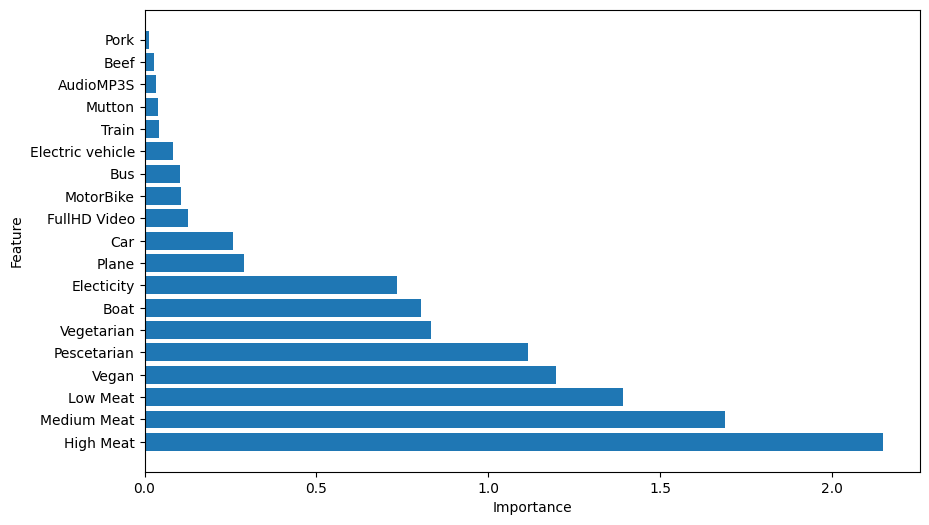

In [ ]:
if hasattr(model, 'coef_'):
    feature_importances = model.coef_  # For linear regression
    sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)
    print("Feature Importances:")
    for importance, feature in sorted_features:
        print(f"{feature}: {importance}")

    # Create a bar plot of feature importances
    importances_df = pd.DataFrame(sorted_features, columns=['Importance', 'Feature'])
    plt.figure(figsize=(10, 6))
    plt.barh(importances_df['Feature'], importances_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('')
    plt.show()

In [ ]:
df1

,Age,High Meat,Low Meat,Medium Meat,Vegan,Vegetarian,Pescetarian,Beef,Fruit,Mutton,...,Electric vehicle,Plane,MotorBike,Train,Electicity,AudioMP3S,FullHD Video,gender,Residence,carbon footprint
0,33,0,1,0,0.0,0.0,0.0,0.0,0.0,113.0,...,0.0,0.0,27.0,0.0,7,0.0,0.0,F,rural,31.035
1,39,0,1,0,0.0,1.0,0.0,0.0,382.0,0.0,...,0.0,0.0,0.0,0.0,8,0.0,0.0,F,rural,11.818
2,26,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,8,0.0,0.0,M,urban,31.067
3,58,1,0,0,0.0,0.0,0.0,132.0,68.0,55.0,...,0.0,0.0,0.0,0.0,5,3.0,6.0,F,rural,19.199
4,24,0,0,0,0.0,1.0,0.0,35.0,239.0,0.0,...,0.0,0.0,19.0,187.0,2,0.0,0.0,F,urban,14.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016,27,0,0,1,0.0,0.0,0.0,0.0,423.0,5.0,...,0.0,0.0,0.0,0.0,10,6.0,6.0,F,urban,17.624
10017,52,0,1,0,0.0,0.0,0.0,0.0,0.0,142.0,...,0.0,0.0,0.0,0.0,2,0.0,4.0,M,rural,11.007
10018,20,1,1,0,0.0,0.0,0.0,36.0,0.0,0.0,...,7.0,0.0,2.0,0.0,10,1.0,5.0,M,urban,18.685
10019,33,1,1,1,0.0,0.0,1.0,0.0,410.0,54.0,...,16.0,0.0,25.0,0.0,6,6.0,3.0,F,rural,23.812


In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named df1
# You can modify the gender and residence mappings as needed
gender_mapping = {'F': 1, 'M': 0}
residence_mapping = {'urban': 1, 'rural': 0}

df1['Gender'] = df1['Gender'].map(gender_mapping)
df1['Residence'] = df1['Residence'].map(residence_mapping)

df1.drop(['Gender', 'Residence'], axis=1, inplace=True)

print(df1)


KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Assuming 'carbon footprint' is your target variable
X =df1.drop(['carbon footprint'], axis=1)
y = df1['carbon footprint']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_test, model.predict(X_test))
print("Baseline Mean Squared Error:", baseline_mse)

# Get feature importances (if applicable)
if hasattr(model, 'coef_'):
    feature_importances = model.coef_  # For linear regression
    sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)
    print("Feature Importances:")
    for importance, feature in sorted_features:
        print(f"{feature}: {importance}")

ValueError: ignored

In [ ]:
if hasattr(model, 'coef_'):
    feature_importances = model.coef_  # For linear regression
    sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)
    print("Feature Importances:")
    for importance, feature in sorted_features:
        print(f"{feature}: {importance}")

    # Create a bar plot of feature importances
    importances_df = pd.DataFrame(sorted_features, columns=['Importance', 'Feature'])
    plt.figure(figsize=(10, 6))
    plt.barh(importances_df['Feature'], importances_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('')
    plt.show()